In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
def scale_to_256(array):
    min_val = np.min(array)
    max_val = np.max(array)

    # Scale the array to the range [0, 255]
    scaled_array = ((array - min_val) / (max_val - min_val)) * 255

    # Round to integers
    scaled_array = scaled_array.astype(np.uint8)

    return scaled_array

In [36]:
def show_data_division(size_x=192,size_y=192):
    inicio_area_livre_x=size_x+80
    fim_area_livre_x=782
    meio_area_livre_x=(fim_area_livre_x-inicio_area_livre_x)/2 + inicio_area_livre_x
    inicio_area_livre_y=size_y+80
    fim_area_livre_y=590
    meio_area_livre_y=(fim_area_livre_y-inicio_area_livre_y)/2 + inicio_area_livre_y

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    plt.grid(False)

    ax.imshow(np.ones([782,590]), cmap='gray', alpha=0.5)

    # Train data
    rect = patches.Rectangle((0, 0), size_y, size_x, linewidth=2, edgecolor='g', facecolor='g', alpha=0.5)
    ax.add_patch(rect)

    # Validation data
    rect = patches.Rectangle((size_y, 0), 80, size_x, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, size_x), size_y+80, 80, linewidth=2, edgecolor='none', facecolor='b', alpha=0.5)
    ax.add_patch(rect)



    end_test_start_x=fim_area_livre_x-80
    end_test_start_y=fim_area_livre_y-80
    end_test_end_y=fim_area_livre_y

    start_test_start_x=inicio_area_livre_x
    start_test_start_y=inicio_area_livre_y
    start_test_end_y=inicio_area_livre_y+80

    mid_test_start_x=meio_area_livre_x-40
    mid_test_start_y=meio_area_livre_y-40
    mid_test_end_y=meio_area_livre_y+40


    # Test data end position
    rect = patches.Rectangle((end_test_start_y, 0), 80, end_test_start_x, linewidth=2, edgecolor='none', facecolor='r', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, end_test_start_x), end_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='r', alpha=0.5)
    ax.add_patch(rect)



    # Test data start position
    rect = patches.Rectangle((start_test_start_y, 0), 80, start_test_start_x, linewidth=2, edgecolor='none', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, start_test_start_x), start_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='purple', alpha=0.5)
    ax.add_patch(rect)



    # Test data mid position
    rect = patches.Rectangle((mid_test_start_y, 0), 80, mid_test_start_x, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)

    rect = patches.Rectangle((0, mid_test_start_x), mid_test_end_y, 80, linewidth=2, edgecolor='none', facecolor='yellow', alpha=0.5)
    ax.add_patch(rect)


    # Add legend
    train_patch = patches.Patch(color='g', label='Training')
    val_patch = patches.Patch(color='b', label='Validation')
    start_test_patch = patches.Patch(color='r', label='Test End')
    mid_test_patch = patches.Patch(color='purple', label='Test Start')
    end_test_patch = patches.Patch(color='yellow', label='Test Mid')


    ax.legend(handles=[train_patch, val_patch, start_test_patch, mid_test_patch, end_test_patch], loc='upper right')

    ax.set_xlim(0, 590)
    ax.set_ylim(782, 0)
    ax.set_title('Data Division')
    plt.show()

fazer a padrao q é a partir do fim ()
fazer um teste a partir do inico da area vazia
fazer um teste a partir do centro da area vazia

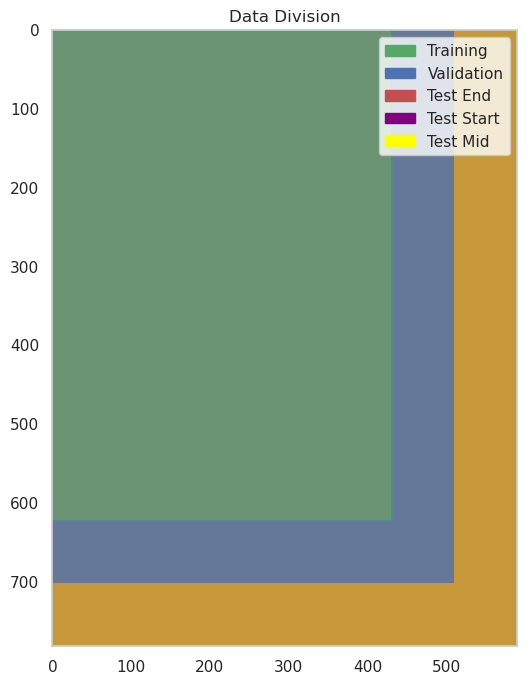

In [47]:
sizetrainx=622
sizetrainy=430
show_data_division(sizetrainx,sizetrainy)

## Graficos gerais

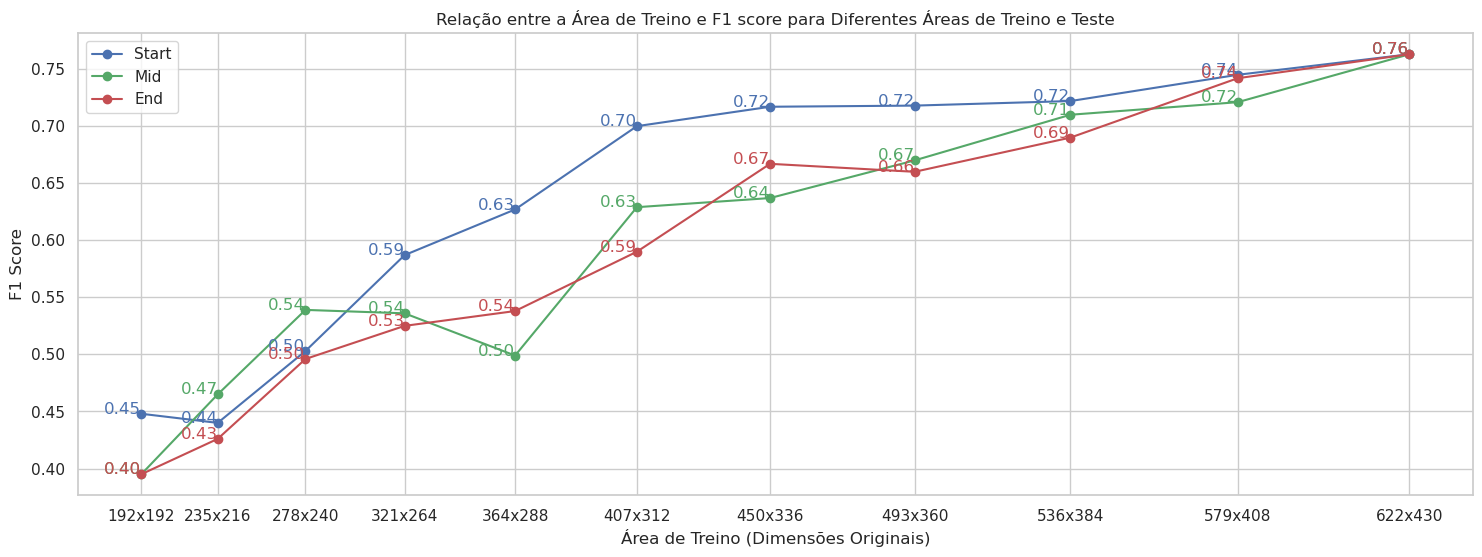

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listas de áreas e múltiplas listas de F1 scores
areas = ['192x192', '235x216', '278x240', '321x264', '364x288', '407x312', '450x336', '493x360', '536x384','579x408','622x430']

# Três diferentes listas de F1 scores
f1_scores_start = [0.448,0.440,0.503,0.587,0.627,0.700,0.717,0.718,0.722,0.745,0.763]
f1_scores_mid = [0.395,0.465,0.539,0.536,0.499,0.629,0.637,0.670,0.710,0.721,0.763]
f1_scores_end = [0.395,0.426,0.496,0.525,0.538,0.590,0.667,0.660,0.690,0.742,0.763]

# Convertendo áreas para uma métrica numérica
areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de linha
plt.figure(figsize=(18, 6))

# Plotando as três listas de F1 scores com cores diferentes
plt.plot(areas_numerical, f1_scores_start, marker='o', linestyle='-', color='b', label='Start')
plt.plot(areas_numerical, f1_scores_mid, marker='o', linestyle='-', color='g', label='Mid')
plt.plot(areas_numerical, f1_scores_end, marker='o', linestyle='-', color='r', label='End')

# Adicionando os valores de F1 no gráfico para cada linha
for i, (area, f1_1, f1_2, f1_3) in enumerate(zip(areas_numerical, f1_scores_start, f1_scores_mid, f1_scores_end)):
    plt.text(area, f1_1, f'{f1_1:.2f}', fontsize=12, ha='right', color='b')
    plt.text(area, f1_2, f'{f1_2:.2f}', fontsize=12, ha='right', color='g')
    plt.text(area, f1_3, f'{f1_3:.2f}', fontsize=12, ha='right', color='r')

# Ajustando os labels do eixo x para mostrar as áreas originais
plt.xticks(areas_numerical, areas)

# Títulos e labels
plt.title('Relação entre a Área de Treino e F1 score para Diferentes Áreas de Treino e Teste')
plt.xlabel('Área de Treino (Dimensões Originais)')
plt.ylabel('F1 Score')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()


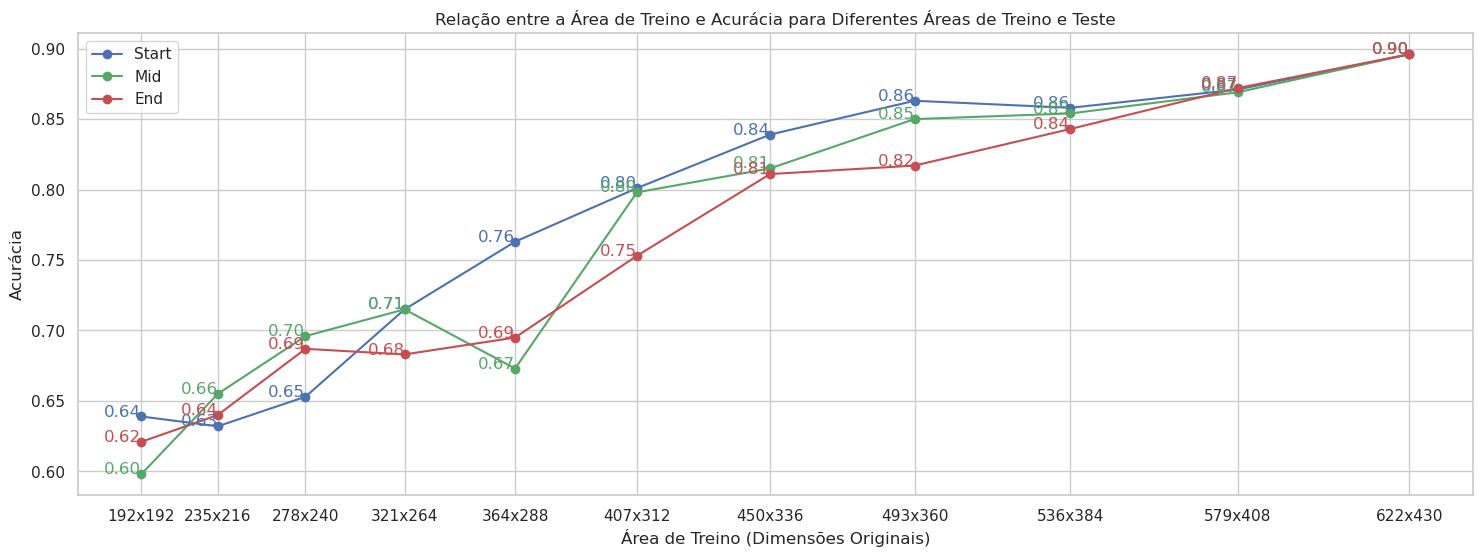

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listas de áreas e múltiplas listas de F1 scores
areas = ['192x192', '235x216', '278x240', '321x264', '364x288', '407x312', '450x336', '493x360', '536x384','579x408','622x430']

# Três diferentes listas de F1 scores

acc_start = [0.639,0.632,0.653,0.715,0.763,0.801,0.839,0.863,0.858,0.871,0.896]
acc_mid = [0.598,0.655,0.696,0.715,0.673,0.798,0.815,0.850,0.854,0.869,0.896]
acc_end = [0.621,0.640,0.687,0.683,0.695,0.753,0.811,0.817,0.843,0.872,0.896]

# Convertendo áreas para uma métrica numérica
areas_numerical = [int(area.split('x')[0]) * int(area.split('x')[1]) for area in areas]

# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de linha
plt.figure(figsize=(18, 6))

# Plotando as três listas de F1 scores com cores diferentes
plt.plot(areas_numerical, acc_start, marker='o', linestyle='-', color='b', label='Start')
plt.plot(areas_numerical, acc_mid, marker='o', linestyle='-', color='g', label='Mid')
plt.plot(areas_numerical, acc_end, marker='o', linestyle='-', color='r', label='End')

# Adicionando os valores de F1 no gráfico para cada linha
for i, (area, f1_1, f1_2, f1_3) in enumerate(zip(areas_numerical, acc_start, acc_mid, acc_end)):
    plt.text(area, f1_1, f'{f1_1:.2f}', fontsize=12, ha='right', color='b')
    plt.text(area, f1_2, f'{f1_2:.2f}', fontsize=12, ha='right', color='g')
    plt.text(area, f1_3, f'{f1_3:.2f}', fontsize=12, ha='right', color='r')

# Ajustando os labels do eixo x para mostrar as áreas originais
plt.xticks(areas_numerical, areas)

# Títulos e labels
plt.title('Relação entre a Área de Treino e Acurácia para Diferentes Áreas de Treino e Teste')
plt.xlabel('Área de Treino (Dimensões Originais)')
plt.ylabel('Acurácia')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()
